In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import xarray.ufuncs as xu
import matplotlib.pyplot as plt
%matplotlib inline
import cmocean as cm
import dask
import dask.array as da
import scipy.io
from scipy import signal
import os
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 63.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61868,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 63.20 GiB
Comm: tcp://127.0.0.1:61901,Total threads: 4
Dashboard: http://127.0.0.1:61904/status,Memory: 15.80 GiB
Nanny: tcp://127.0.0.1:61873,


In [90]:
# url = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/users/scook/proj/DE_Bay/run07/run07C/ocean_deb_his_run07C_tsvar_00010.nc'
url = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/users/scook/proj/DE_Bay/run07/run07C/ocean_deb_his_run07C_tsvar_00001.nc'
ds = xr.open_dataset(url, chunks={'ocean_time':1})
ds

<xarray.Dataset>
Dimensions:          (boundary: 4, eta_psi: 1369, eta_rho: 1370, eta_u: 1370, eta_v: 1369, ocean_time: 721, s_rho: 16, s_w: 17, tracer: 5, xi_psi: 183, xi_rho: 184, xi_u: 183, xi_v: 184)
Coordinates:
  * s_rho            (s_rho) float64 -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 -1.0 -0.9375 -0.875 ... -0.125 -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2019-01-01 ... 2019-01-31
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes           int32 ...
    ndtfast          int32 ...
    dt               float64 ...
    dtfast           float64 ...
    dstart           datetime64[ns] ...
    nHIS             int32 ...
    ndefHIS          int32 ...
    nRST             int32 ...
    Falpha           float64 ...
    Fbeta            float64 ...
    Fgamma           float64 ...
    nl_tnu2          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    nl_visc2         float64 ...
    LuvSponge        int32 ...
    LtracerSponge    (tracer) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    Akt_bak          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Akv_bak          float64 ...
    Akk_bak          float64 ...
    Akp_bak          float64 ...
    rdrg             float64 ...
    rdrg2            float64 ...
    Zob              float64 ...
    Zos              float64 ...
    gls_p            float64 ...
    gls_m            float64 ...
    gls_n            float64 ...
    gls_cmu0         float64 ...
    gls_c1           float64 ...
    gls_c2           float64 ...
    gls_c3m          float64 ...
    gls_c3p          float64 ...
    gls_sigk         float64 ...
    gls_sigp         float64 ...
    gls_Kmin         float64 ...
    gls_Pmin         float64 ...
    Charnok_alpha    float64 ...
    Zos_hsig_alpha   float64 ...
    sz_alpha         float64 ...
    CrgBan_cw        float64 ...
    Znudg            float64 ...
    M2nudg           float64 ...
    M3nudg           float64 ...
    Tnudg            (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Tnudg_SSS        float64 ...
    FSobc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    FSobc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Tobc_in          (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    Tobc_out         (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    M3obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M3obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    rho0             float64 ...
    R0               float64 ...
    Tcoef            float64 ...
    Scoef            float64 ...
    gamma2           float64 ...
    LuvSrc           int32 ...
    LwSrc            int32 ...
    LtracerSrc       (tracer) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    LsshCLM          i

### import locally (decrease computation time)

In [161]:
# path = 'COAWST_Model_Output/salt.nc'
# ds = xr.open_dataset(path, chunks={'ocean_time':1})
# dist_mile = xr.DataArray(dist_mile,dims=['points'])
# ds = xr.Dataset(ds, coords={'dist_mile': dist_mile})
# ds

<xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 1370, s_rho: 16)
Coordinates:
  * s_rho       (s_rho) float64 -0.9688 -0.9062 -0.8438 ... -0.09375 -0.03125
    lon_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, s_rho, points) float32 dask.array<chunksize=(1, 16, 1370), meta=np.ndarray>

In [68]:
river_mile_coords = pd.read_csv('river_mile_coords.csv', index_col=0 )
target_x = np.array(river_mile_coords.iloc[:,[1]].values).squeeze()
target_x = xr.DataArray(target_x-1, dims=["points"]) 
target_y = np.array(river_mile_coords.iloc[:,[2]].values).squeeze()
target_y = xr.DataArray(target_y-1,dims=["points"])

In [69]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml\\methods_exploration\\COAWST_Model_Output'

In [70]:
dist_mile = np.array(river_mile_coords.iloc[:,[0]].values)
dist_mile = dist_mile.squeeze()
dist_mile = xr.DataArray(dist_mile,dims=['points']) #change to points
dist_mile = dist_mile.values
dist_mile

array([ -6.86446808,  -6.73695053,  -6.60944252, ..., 134.16375535,
       134.32597435, 134.48806645])

In [81]:
salt = ds.isel(xi_rho=target_x, eta_rho=target_y)

In [82]:
# salt = salt.salt
salt = salt.isel(s_rho=0)

In [83]:
dist_mile = xr.DataArray(dist_mile,dims=['points'])
salt = salt.assign_coords({'dist_mile': dist_mile})

In [85]:
# saltfront = salt.where(salt < 0.52).where(salt > 0.51)
saltfront = salt.where(salt.salt < 0.52).where(salt.salt > 0.51)
# salfront_values = saltfront.where(saltfront.max('points'))
# saltfront_values.to_dataframe()

In [86]:
saltfront_location = saltfront.where(saltfront.max('ocean_time'))

In [87]:
saltfront_location

C:\ProgramData\Anaconda3\envs\estuary\lib\site-packages\dask\array\core.py:1472: RuntimeWarning: overflow encountered in long_scalars
  cbytes = format_bytes(np.prod(self.chunksize) * self.dtype.itemsize)


<xarray.Dataset>
Dimensions:          (boundary: 4, eta_psi: 1369, eta_u: 1370, eta_v: 1369, ocean_time: 720, points: 1370, s_w: 17, tracer: 5, xi_psi: 183, xi_u: 183, xi_v: 184)
Coordinates:
    s_rho            float64 -0.9688
  * s_w              (s_w) float64 -1.0 -0.9375 -0.875 ... -0.125 -0.0625 0.0
    lon_rho          (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho          (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019...
    dist_mile        (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: boundary, eta_psi, eta_u, eta_v, points, tracer, xi_psi, xi_u, xi_v
Data variables:
    ntimes           (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    ndtfast          (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    dt               (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    dtfast           (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    dstart           (ocean_time, points) datetime64[ns] dask.array<chunksize=(1, 1370), meta=np.ndarray>
    nHIS             (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    ndefHIS          (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    nRST             (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    Falpha           (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    Fbeta            (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    Fgamma           (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    nl_tnu2          (tracer, ocean_time, points) float64 dask.array<chunksize=(5, 1, 1370), meta=np.ndarray>
    nl_visc2         (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    LuvSponge        (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    LtracerSponge    (tracer, ocean_time, points) float64 dask.array<chunksize=(5, 1, 1370), meta=np.ndarray>
    Akt_bak          (tracer, ocean_time, points) float64 dask.array<chunksize=(5, 1, 1370), meta=np.ndarray>
    Akv_bak          (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    Akk_bak          (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    Akp_bak          (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    rdrg             (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    rdrg2            (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    Zob              (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    Zos              (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    gls_p            (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    gls_m            (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    gls_n            (ocean_time, points) float64 dask.array<chunksize=(1, 1370), meta=np.ndarray>
    gls_cmu0         (ocean_time, points) float64 dask.arra

In [ ]:
# saltfront_location= saltfront_location.to_dataframe()
test = salt[['salt']].to_dataframe()
test

In [88]:
# lats = saltfront_location.variables['lat_rho'][:]  # extract/copy the data
# lons = saltfront_location.variables['lon_rho'][:]
# time = saltfront_location.variables['ocean_time'][:]
# salinity = saltfront_location.salt.values
# dist_mile = saltfront_location.variables['dist_mile'][:]

In [ ]:
# data = {'ocean_time': time,
#         'lat': lats,
#        'lon': lons,
#        'salt': salinity,
#        'dist_mile': dist_mile}
# df = pd.DataFrame(data)
# df

In [245]:
salt

<xarray.Variable (ocean_time: 720, eta_rho: 1370, xi_rho: 184)>
dask.array<where, shape=(720, 1370, 184), dtype=float32, chunksize=(720, 1370, 184), chunktype=numpy.ndarray>
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       grid
    location:   face
    field:      salinity, scalar, series

In [ ]:
df = saltfront_location[saltfront_location['salt'].notnull()]

In [173]:
df = saltfront_location[saltfront_location['salt'].notna()]
df = df.droplevel(level=1)
df

,salt,s_rho,lon_rho,lat_rho,dist_mile
ocean_time,,,,,
2019-09-28 02:00:00,0.514313,-0.96875,-75.409034,39.807939,79.185240
2019-09-28 02:00:00,0.512174,-0.96875,-75.408179,39.808519,79.251298
2019-09-28 03:00:00,0.516436,-0.96875,-75.386823,39.820431,80.794789
2019-09-28 04:00:00,0.519163,-0.96875,-75.347027,39.842247,83.647922
2019-09-28 04:00:00,0.514050,-0.96875,-75.345878,39.842702,83.721712
...,...,...,...,...,...
2019-10-27 19:00:00,0.517190,-0.96875,-75.333459,39.847749,84.483010
2019-10-27 20:00:00,0.512234,-0.96875,-75.371609,39.828046,81.858909
2019-10-27 21:00:00,0.517799,-0.96875,-75.399804,39.809850,79.710148


In [174]:
df = df.resample('1D').mean()
# salt_daily = saltfront_location.groupby('ocean_time.day').mean('ocean_time')
# salt_daily = salt_daily.to_dataframe()
df

,salt,s_rho,lon_rho,lat_rho,dist_mile
ocean_time,,,,,
2019-09-28,0.514530,-0.96875,-75.383521,39.820588,80.952996
2019-09-29,0.515184,-0.96875,-75.375344,39.824451,81.512187
2019-09-30,0.515213,-0.96875,-75.359667,39.827045,82.412903
2019-10-01,0.514956,-0.96875,-75.345774,39.831598,83.283082
2019-10-02,0.514394,-0.96875,-75.357283,39.829902,82.628774
2019-10-03,0.515585,-0.96875,-75.354388,39.830434,82.800818
2019-10-04,0.514963,-0.96875,-75.299376,39.844502,86.100251
2019-10-05,0.514766,-0.96875,-75.319249,39.840083,84.939771
2019-10-06,0.515470,-0.96875,-75.323028,39.840144,84.751451


<AxesSubplot:xlabel='ocean_time'>

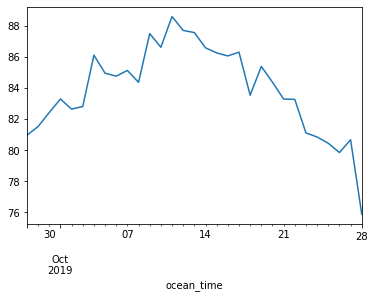

In [175]:
df['dist_mile'].plot()

In [93]:
df.index = pd.to_datetime(df.index)

In [94]:
df

,s_rho,lon_rho,lat_rho,dist_mile,salt
ocean_time,,,,,
2019-09-28,-0.96875,-75.383521,39.820588,80.952996,0.514530
2019-09-29,-0.96875,-75.375344,39.824451,81.512187,0.515184
2019-09-30,-0.96875,-75.359667,39.827045,82.412903,0.515213
2019-10-01,-0.96875,-75.345774,39.831598,83.283082,0.514956
2019-10-02,-0.96875,-75.357283,39.829902,82.628774,0.514394
2019-10-03,-0.96875,-75.354388,39.830434,82.800818,0.515585
2019-10-04,-0.96875,-75.299376,39.844502,86.100251,0.514963
2019-10-05,-0.96875,-75.319249,39.840083,84.939771,0.514766
2019-10-06,-0.96875,-75.323028,39.840144,84.751451,0.515470
